In [ ]:
!git clone https://github.com/NeuralClassifier/ReusabilityRate_ML
!git checkout corr_analysis
%cd /content/ReusabilityRate_ML/DataSets

In [ ]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statistics
import tensorflow as tf

import warnings
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
cls_df = pd.read_excel('classes.xlsx')
pkg_df = pd.read_excel('packages.xlsx')
cls_df.drop(['Unnamed: 0'], axis=1, inplace=True)
pkg_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
from scipy import stats

CLS_Q1 = cls_df['ReuseRate'].quantile(0.25)
CLS_Q3 = cls_df['ReuseRate'].quantile(0.75)
CLS_IQR = CLS_Q3 - CLS_Q1
CLS_TH = cls_df['ReuseRate'].mean() * 5



cls_df['ReuseRate'] = cls_df['ReuseRate'].apply(lambda x: CLS_TH if x > CLS_TH else x)

cls_df['ReuseRate_lbl'] = pd.cut(cls_df['ReuseRate'], bins=5, labels=np.arange(5))

In [ ]:
PKG_Q1 = pkg_df['ReuseRate'].quantile(0.25)
PKG_Q3 = pkg_df['ReuseRate'].quantile(0.75)
PKG_IQR = PKG_Q3 - PKG_Q1
PKG_TH = cls_df['ReuseRate'].mean() * 5

pkg_df['ReuseRate'] = pkg_df['ReuseRate'].apply(lambda x: PKG_TH if x > PKG_TH else x)

pkg_df['ReuseRate_lbl'] = pd.cut(pkg_df['ReuseRate'], bins=5, labels=np.arange(5))

In [ ]:
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(0, 5))

for df in [cls_df, pkg_df]:
  for col in df.columns:
    if col in ['Project', 'LongName', 'Name']:
      continue
    if col == 'ReuseRate':
      continue
    else:
      x_scaler.fit(df[[col]])
      df[col] = x_scaler.transform(df[[col]])
    print(col + ' is done!')



In [ ]:
cls_df


,Project,LongName,Name,LCOM5,NL,NLE,WMC,CBO,CBOI,NII,NOI,RFC,AD,CD,TCD,CLOC,TCLOC,DLOC,PDA,DIT,LLOC,LOC,TLOC,NG,TLLOC,TNA,TNG,TNM,TNOS,TNPM,ReuseRate,ReuseRate_lbl
0,ch.qos.logback/logback-classic,ch.qos.logback.classic.AsyncAppender,AsyncAppender,-0.976331,-0.916667,-0.8,-0.990539,-0.982979,-1.000000,-1.000000,-0.984127,-0.979975,-0.333334,-0.110417,-0.110417,-0.995522,-0.995522,-0.995389,-0.993651,-1.000000,-0.991793,-0.993978,-0.993978,-1.000000,-0.995344,-0.997199,-1.0000,-0.995408,-0.996554,-0.997253,5.307617,4
1,ch.qos.logback/logback-classic,ch.qos.logback.classic.BasicConfigurator,BasicConfigurator,-0.988166,-1.000000,-1.0,-0.996216,-0.957447,-0.996370,-0.998538,-0.988095,-0.987484,-0.333334,-0.322223,-0.322223,-0.996802,-0.996802,-0.997695,-0.993651,-0.777778,-0.990828,-0.993548,-0.993548,-1.000000,-0.994796,-1.000000,-1.0000,-0.997704,-0.993109,-0.997253,4.000000,3
2,ch.qos.logback/logback-classic,ch.qos.logback.classic.ClassicConstants,ClassicConstants,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-0.974592,-1.000000,-1.000000,-1.000000,-1.000000,-0.346428,-0.346428,-0.997121,-0.997121,-0.997036,-1.000000,-1.000000,-0.991311,-0.992687,-0.992687,-1.000000,-0.995070,-0.952381,-1.0000,-1.000000,-1.000000,-1.000000,5.307617,4
3,ch.qos.logback/logback-classic,ch.qos.logback.classic.Level,Level,-0.988166,-0.916667,-0.8,-0.912961,-1.000000,-0.883848,-0.970760,-1.000000,-0.967459,1.000000,-0.242484,-0.242484,-0.969615,-0.969615,-0.969043,-0.923810,-1.000000,-0.923244,-0.941284,-0.941284,-1.000000,-0.956450,-0.932773,-1.0000,-0.985075,-0.966527,-0.984890,5.307617,4
4,ch.qos.logback/logback-classic,ch.qos.logback.classic.Logger,Logger,-0.988166,-0.750000,-0.4,-0.708609,-0.957447,-0.916515,-0.969298,-0.956349,-0.732165,-0.851852,-0.581752,-0.581752,-0.958420,-0.958420,-0.960481,-0.961905,-1.000000,-0.758146,-0.838047,-0.838047,-0.929293,-0.862777,-0.971989,-0.9375,-0.889782,-0.877923,-0.890110,5.307617,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24789,xerces/xercesImpl,org.apache.xml.serialize.SecuritySupport$4,SecuritySupport$4,-0.988166,-1.000000,-1.0,-0.998108,-1.000000,-1.000000,-1.000000,-1.000000,-0.997497,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.998069,-0.999140,-0.999140,-1.000000,-0.998904,-1.000000,-1.0000,-0.998852,-0.999508,-0.998626,0.000000,0
24790,xerces/xercesImpl,org.apache.xml.serialize.SecuritySupport$5,SecuritySupport$5,-0.988166,-1.000000,-1.0,-0.998108,-1.000000,-1.000000,-1.000000,-1.000000,-0.997497,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.998069,-0.999140,-0.999140,-1.000000,-0.998904,-1.000000,-1.0000,-0.998852,-0.999508,-0.998626,0.000000,0
24791,xerces/xercesImpl,org.apache.xml.serialize.SecuritySupport$6,SecuritySupport$6,-0.988166,-0.916667,-0.8,-0.996216,-1.000000,-1.000000,-1.000000,-1.000000,-0.997497,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.995173,-0.997849,-0.997849,-1.000000,-0.997261,-1.000000,-1.0000,-0.998852,-0.997539,-0.998626,0.000000,0
24792,xerces/xercesImpl,org.apache.xml.serialize.SecuritySupport$7,SecuritySupport$7,-0.988166,-1.000000,-1.0,-0.996216,-1.000000,-1.000000,-1.000000,-1.000000,-0.997497,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.998069,-0.999140,-0.999140,-1.000000,-0.998904,-1.000000,-1.0000,-0.998852,-0.999508,-0.998626,0.000000,0


### Data visualization

No handles with labels found to put in legend.


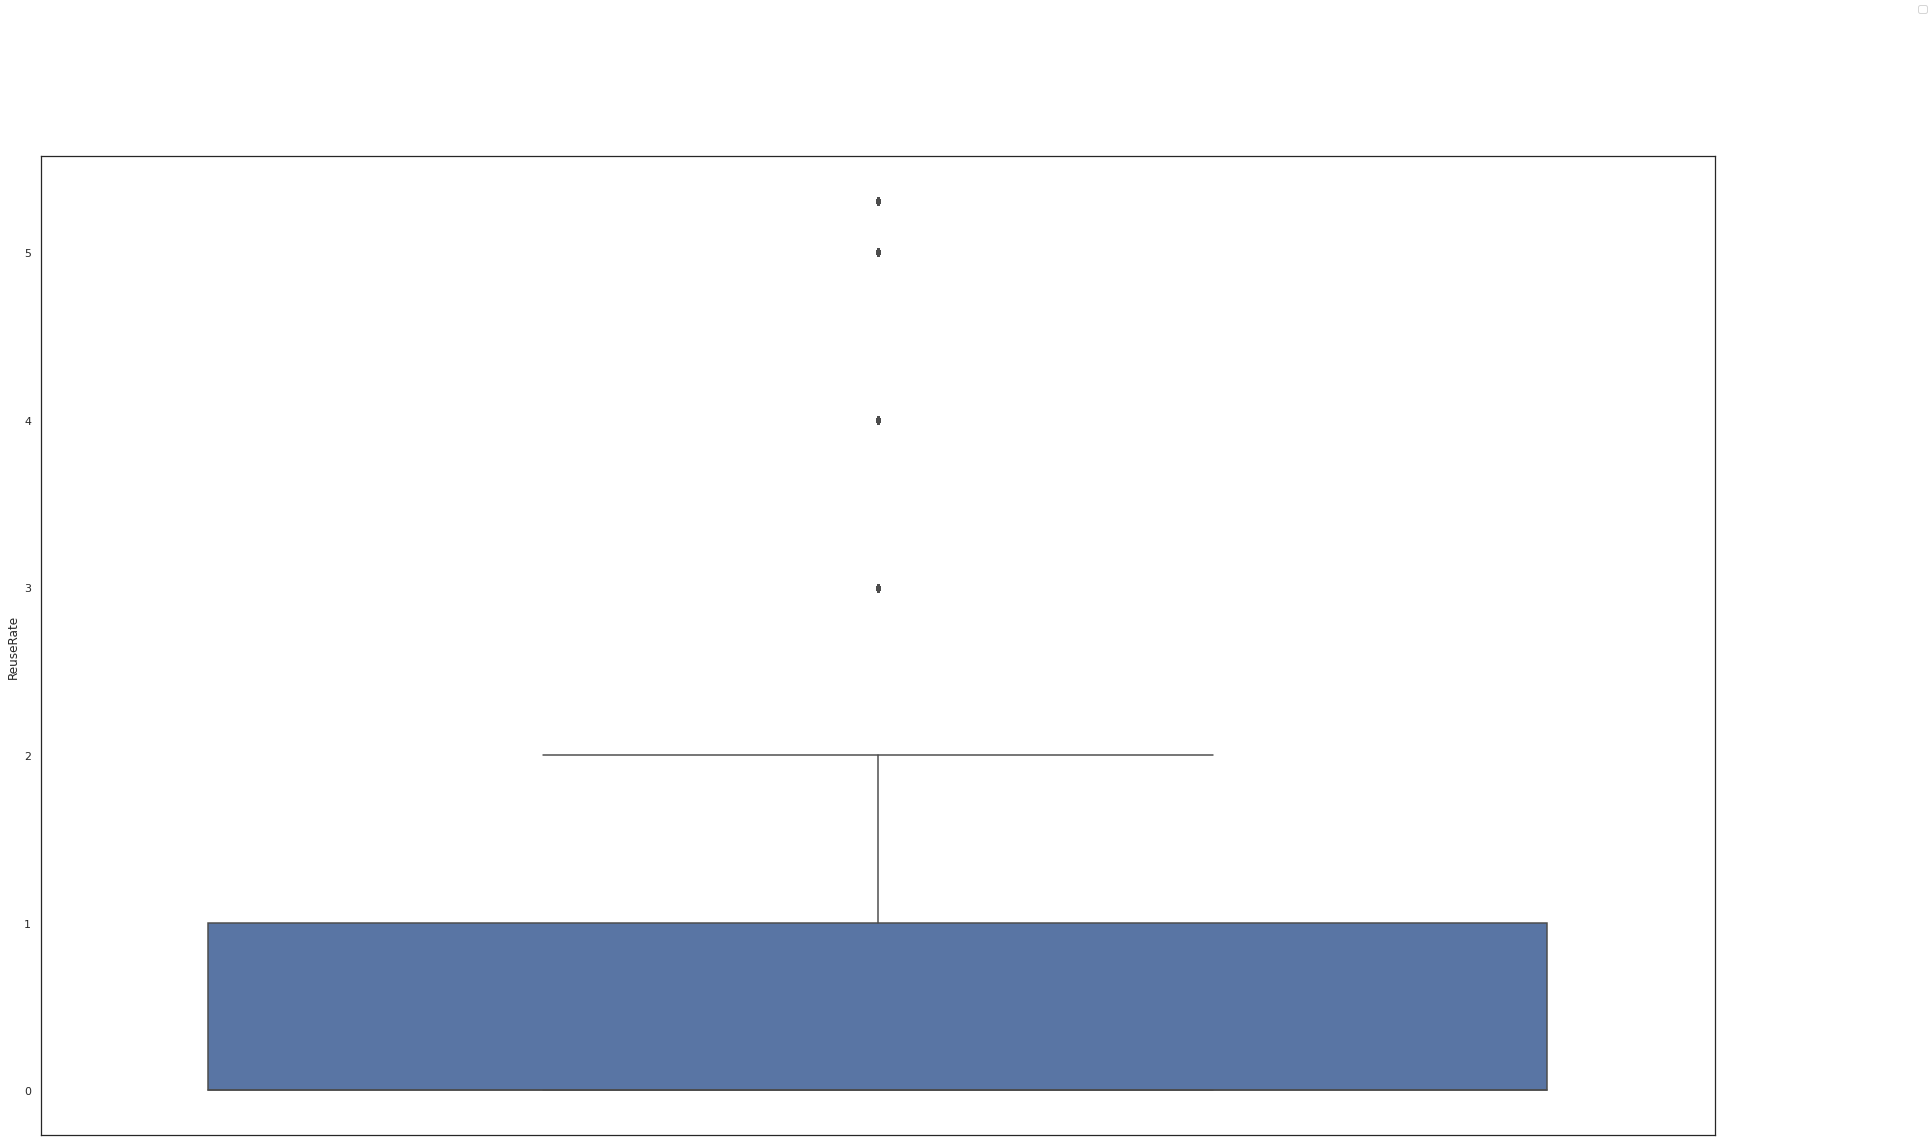

In [ ]:
sns.set_theme(style="white")
fig = plt.figure(figsize=(30, 18))
ax = sns.boxplot(data=cls_df, y='ReuseRate')
fig.legend()
plt.show()


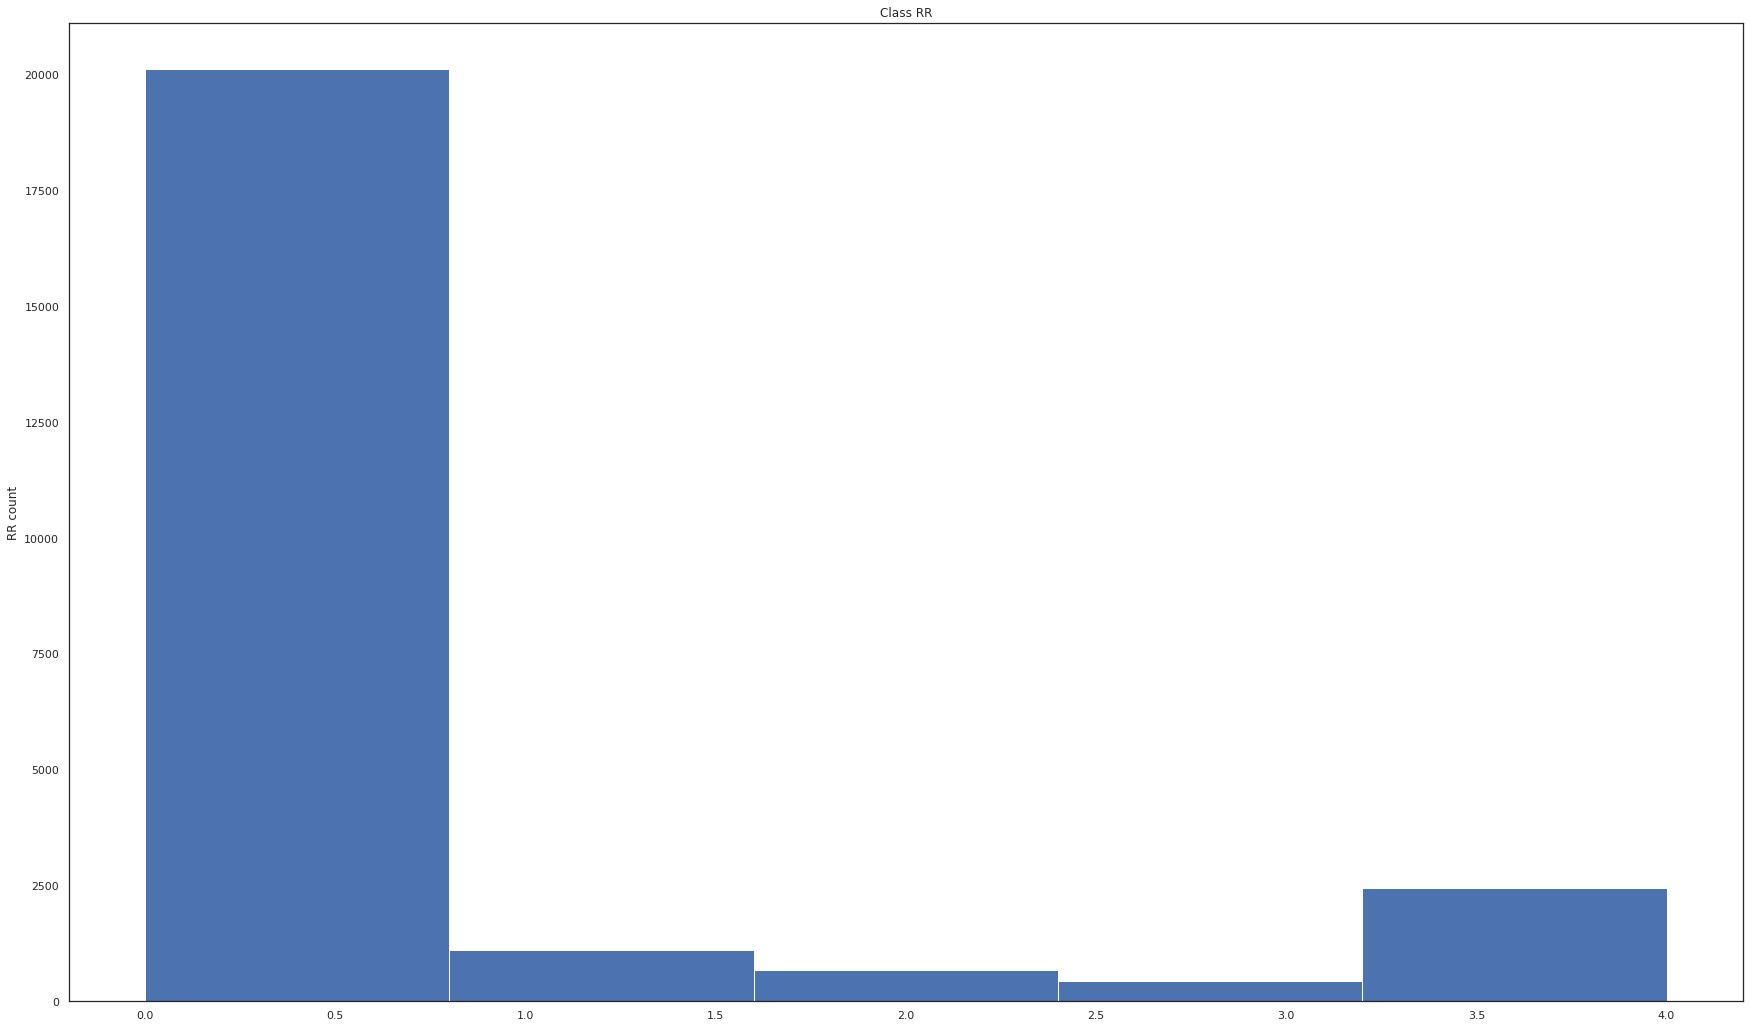

In [ ]:
sns.set_theme(style="white")

fig = plt.figure(figsize=(30, 18))
plt.hist(cls_df['ReuseRate_lbl'], bins=5)
plt.gca().set(title='Class RR', ylabel='RR count');

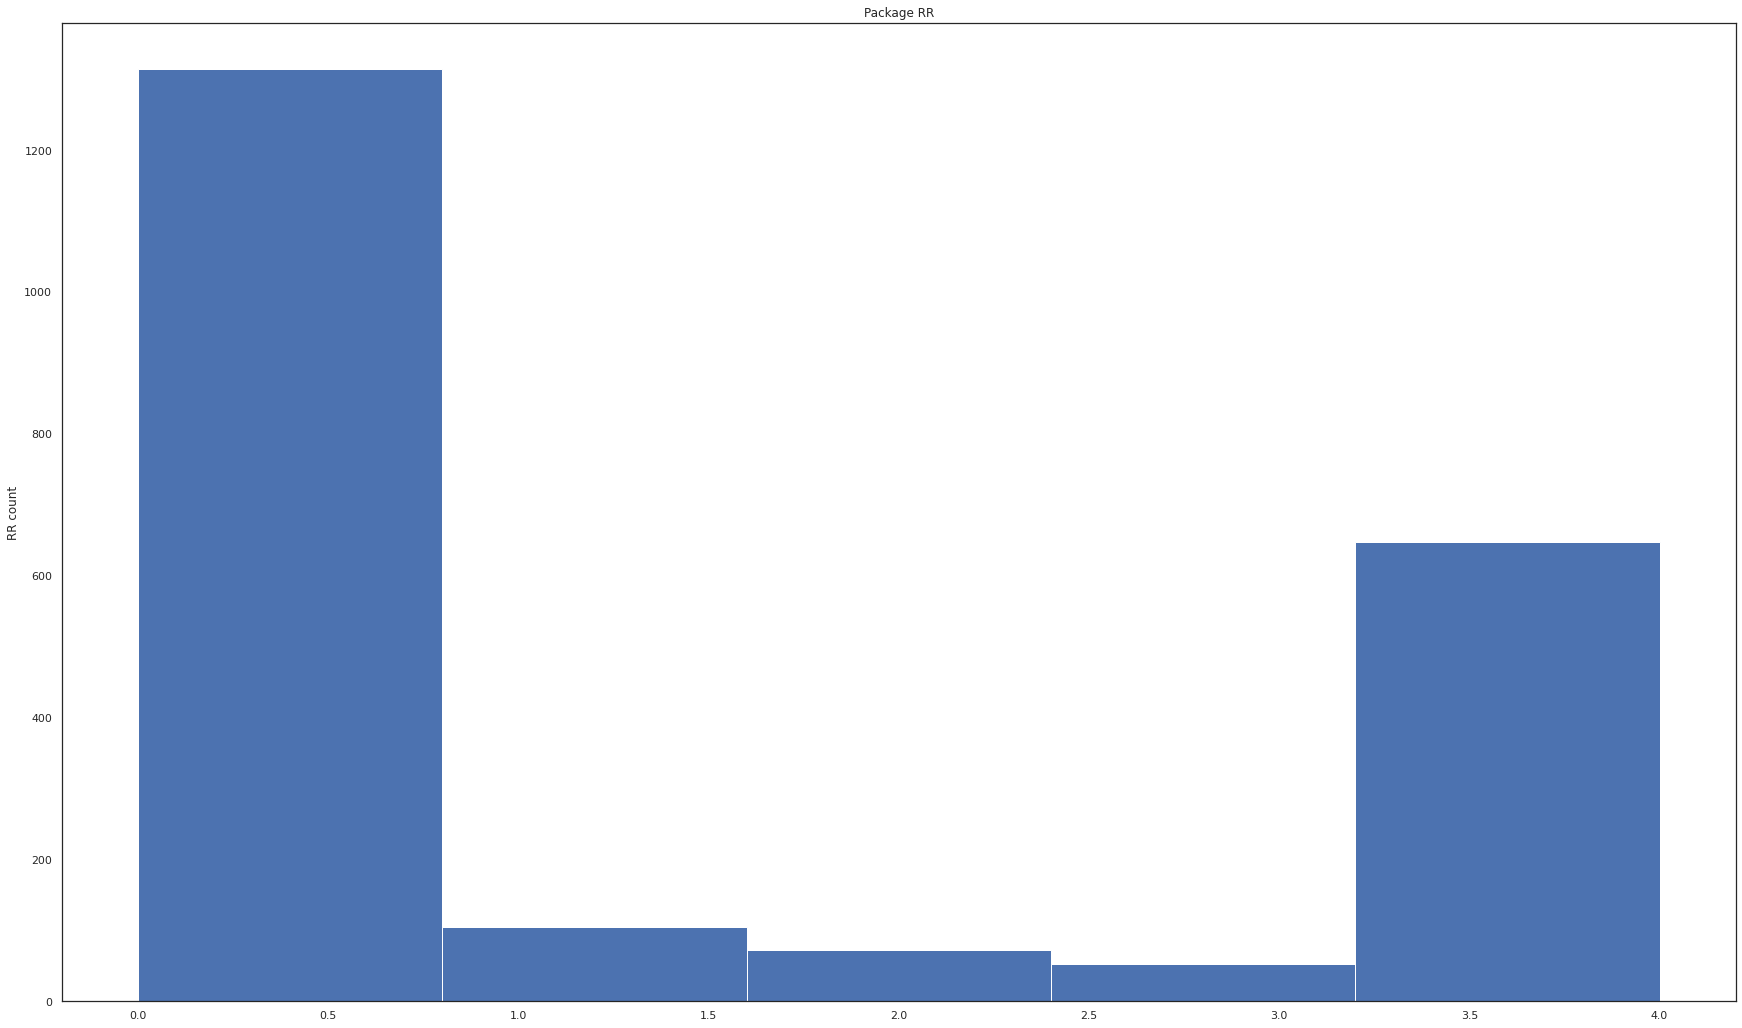

In [ ]:
sns.set_theme(style="white")

fig = plt.figure(figsize=(30, 18))
plt.hist(pkg_df['ReuseRate_lbl'], bins=5)
plt.gca().set(title='Package RR', ylabel='RR count');

In [ ]:
#save data to csv files
cls_df.to_csv('cls_normalized.csv')
pkg_df.to_csv('pkg_normalized.csv')